In [1]:
cd ..

/home/mars/mount/src_aiai


In [2]:
__requires__= 'numpy>=1.16.5'
import pkg_resources
pkg_resources.require('numpy>=1.16.5')
import numpy as np

In [3]:
import pickle
# import numpy as np
import matplotlib.pyplot as plt
from src.visualisation import compare
import pandas as pd
import seaborn as sns
import tqdm

In [4]:
data = "COCO"
ISNR = 30

In [5]:
from skimage.metrics import structural_similarity, peak_signal_noise_ratio, mean_squared_error

In [6]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
def print_statistics(statistics, results, metrics):
    print(f"|{'Name':40}|", end="")
    for metric, f in metrics:
        print(f"{metric:40}|", end="")
    print()
    for name, set, _ in sorted(results):
        print(f"|{name+'_'+set:40}|", end="")
        for metric, f in metrics:
            print(f"{np.mean(statistics[metric][(statistics.Method == name) * (statistics.Set == set)]):8.3f} \pm {np.std(statistics[metric][(statistics.Method == name) * (statistics.Set == set)]):7.3f}|", end="")
        print()

In [8]:
def plot_statistics(statistics, metrics):
    fig, ax = plt.subplots(ncols=len(metrics), figsize=(len(metrics)*8, 6))
    for idx, (metric, _) in enumerate(metrics):
        plt.sca(ax[idx])
        sns.set_style('whitegrid')
        sns.violinplot(data=statistics, x='Method', y=metric, split=True, hue='Set', palette="Set3", bw=.2, cut=1, linewidth=1, inner='quart', orientation='v')
#         sns.violinplot(data=statistics, x='Method', y=metric, split=False, hue='Set', palette="Set3", bw=.2, cut=1, linewidth=1, inner='quart', orientation='v')
        plt.ylabel(metric, fontsize='x-large')
        plt.xlabel("")
        ax[idx].tick_params(labelsize='x-large', rotation=90)
        # ax[idx].xaxis.label.set_size('x-large')
        sns.despine(left=True, bottom=True)
        plt.legend(loc="upper left", fontsize='large')
    ax[0].set_ylim( [0 ,40])
    ax[2].set_ylim([ 0,0.04])
    plt.show()

In [9]:
name_net_post = [
    ("Adjoint", "adjoint", "_sigmoid"),
    ("Learned Adjoint", "adjoint", "_sigmoid_learned_adjoint"),

    ("U-net", "unet", "_sigmoid"),
    ("U-net learned adjoint", "unet", "_sigmoid_learned_adjoint"),
    
    ("dU-net", "dunet", "_sigmoid"),
    ("dU-net learned adjoint", "dunet", "_sigmoid_learned_adjoint"),
    ("dU-net learned grad", "dunet", "_sigmoid_learned_grad"),
    ("dU-net grad upsample", "dunet", "_sigmoid_upsample_grad"),
]


In [10]:
results = []
results += [(name, "Train", f"./data/processed/{data}/train_predict_{net}_{ISNR}dB{post}.npy") for name, net, post in name_net_post]
# results += [(name, "Test", f"./data/processed/{data}/test_predict_{net}_{ISNR}dB{post}.npy") for name, net, post in name_net_post]
# results += [("Primal Dual", mode, f"./data/processed/{data}/PD_{mode.lower()}_predict_{ISNR}dB.npy") for  mode in ["Train", "Test"]]
results += [("Primal Dual", mode, f"./data/processed/{data}/PD_{mode.lower()}_predict_{ISNR}dB.npy") for  mode in ["Train"]]


metrics = [
    ("PSNR", peak_signal_noise_ratio),
    ("SSIM", structural_similarity),
    ("MSE", mean_squared_error)
]

In [102]:
statistics = pd.read_csv("statistics.csv")
with pd.option_context('mode.use_inf_as_na', True):
    statistics.dropna(inplace=True)

In [103]:
# statistics = statistics[statistics.Set == "Train"]

|Name                                    |PSNR                                    |SSIM                                    |MSE                                     |
|Adjoint_Train                           |   7.465 \pm   2.330|   0.099 \pm   0.054|   0.203 \pm   0.096|
|Learned Adjoint_Train                   |  10.772 \pm  32.712|   0.136 \pm   0.100|   0.188 \pm   0.087|
|Primal Dual_Train                       |  17.635 \pm   2.617|   0.628 \pm   0.104|   0.020 \pm   0.010|
|U-net_Train                             |  18.540 \pm   2.641|   0.674 \pm   0.119|   0.016 \pm   0.008|
|U-net learned adjoint_Train             |  18.093 \pm   2.248|   0.623 \pm   0.139|   0.018 \pm   0.008|
|dU-net_Train                            |  14.366 \pm   2.413|   0.608 \pm   0.120|   0.041 \pm   0.017|
|dU-net grad upsample_Train              |  17.710 \pm   2.191|   0.619 \pm   0.117|   0.019 \pm   0.009|
|dU-net learned adjoint_Train            |  18.848 \pm   2.341|   0.647 \pm   0.120|   0.015

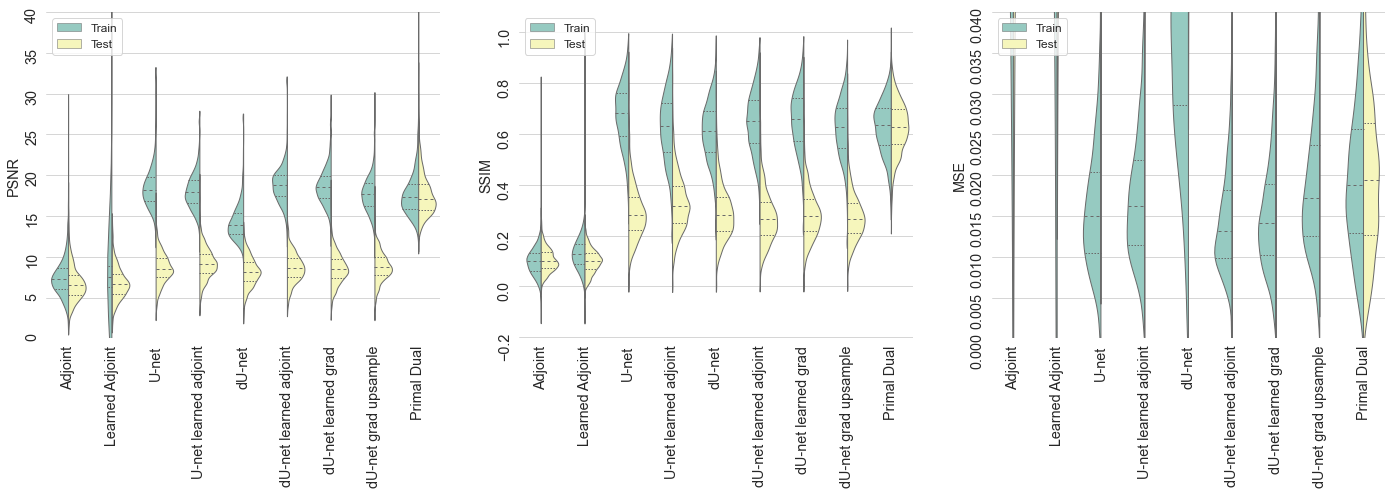

In [104]:
print_statistics(statistics, results, metrics)
plot_statistics(statistics, metrics)

In [14]:
examples = pickle.load(open("examples.pkl", "rb"))

In [18]:
train_ims = []
test_ims = []
train_titles = []
test_titles = []
i=0
for name, mode, im in examples:
    if mode == "Train":
#         train_ims.append(im[i])
        train_titles.append(name)
    else:
        train_ims.append(im[i])
        
        test_ims.append(im[i])
        test_titles.append(name)

ValueError: too many values to unpack (expected 3)

True Train


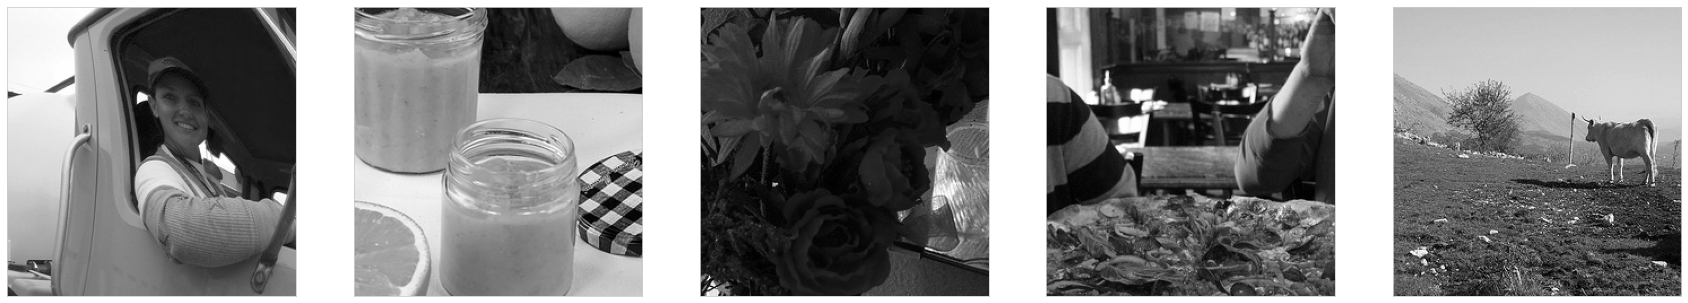

True Test


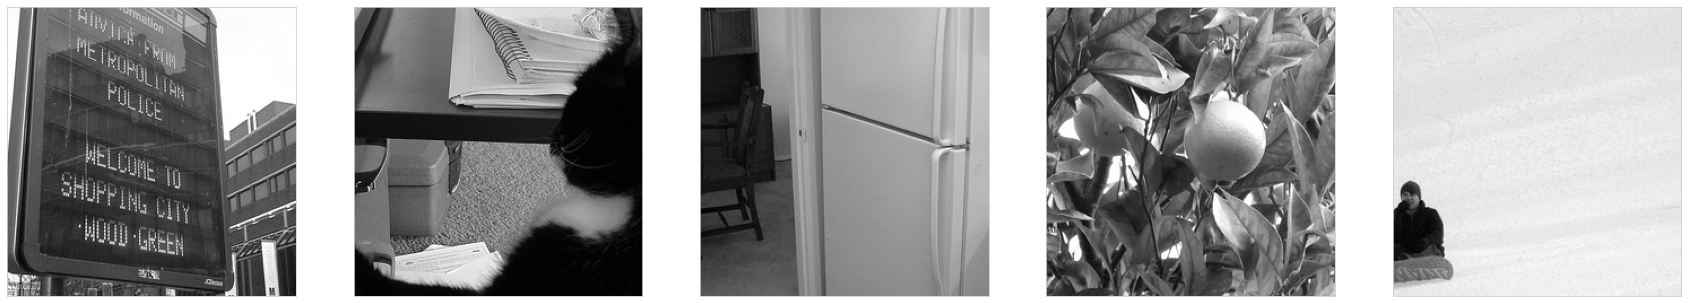

Adjoint Train


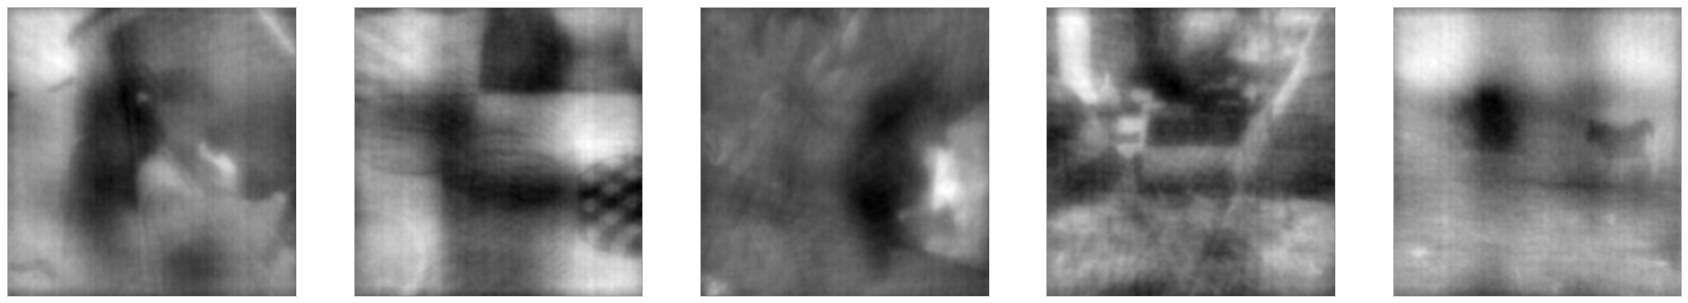

Learned Adjoint Train


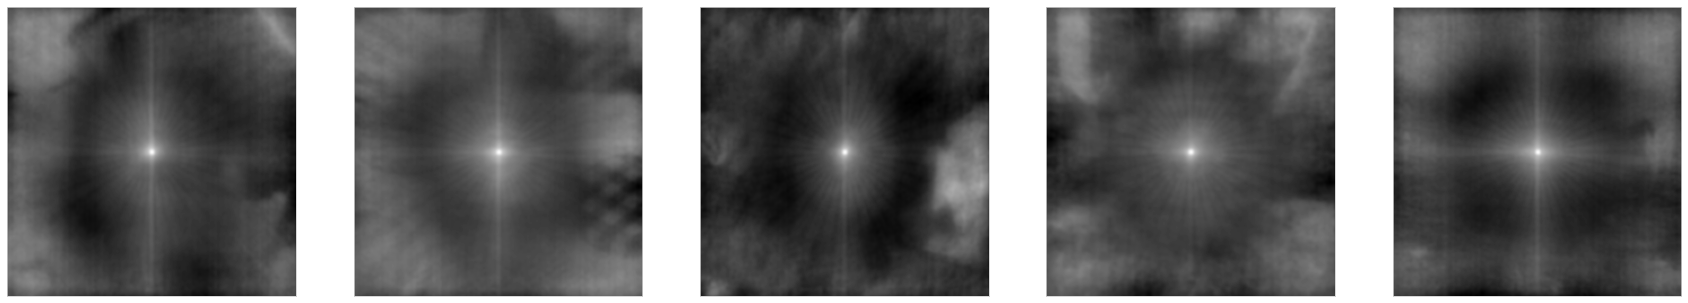

U-net Train


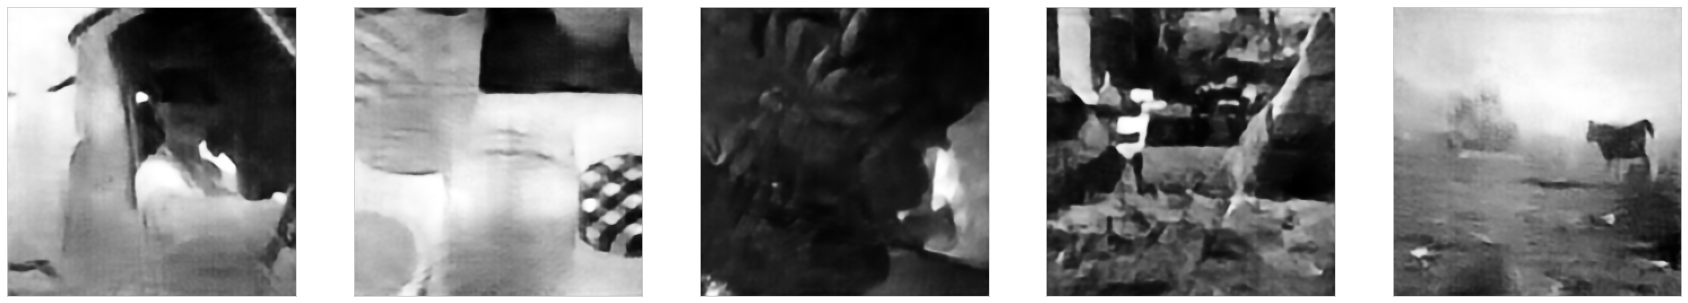

U-net learned adjoint Train


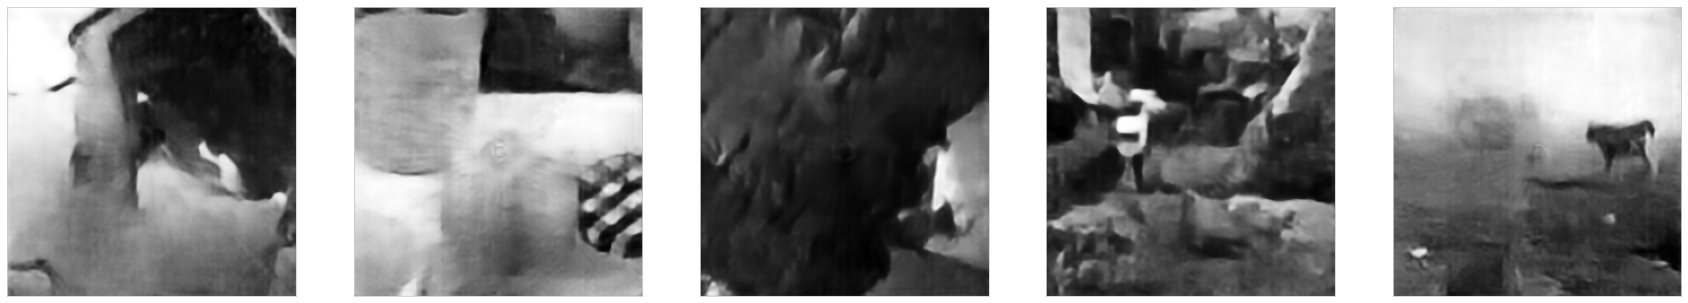

dU-net Train


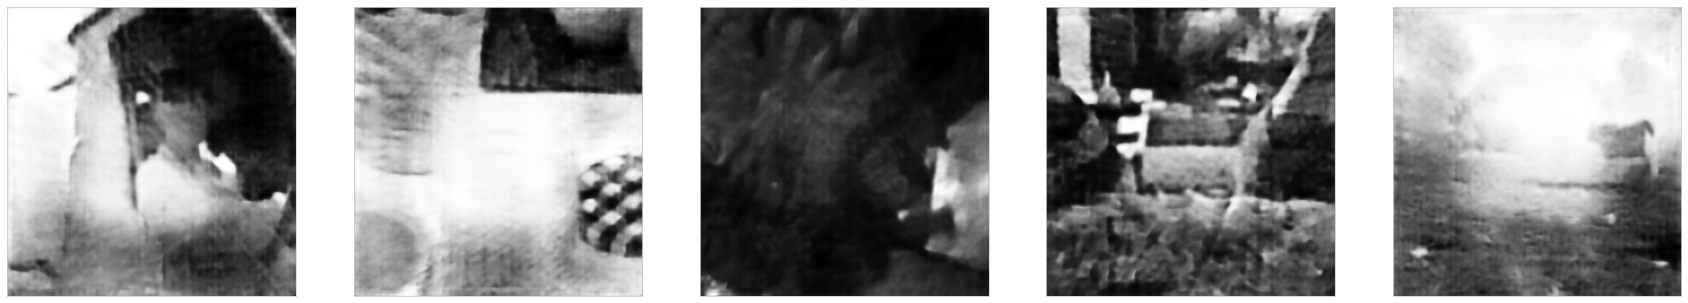

dU-net learned adjoint Train


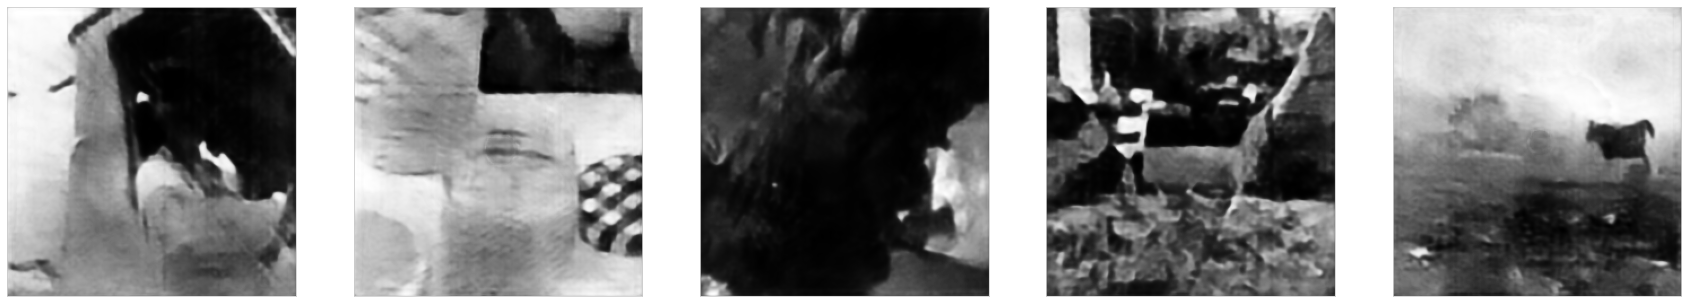

dU-net learned grad Train


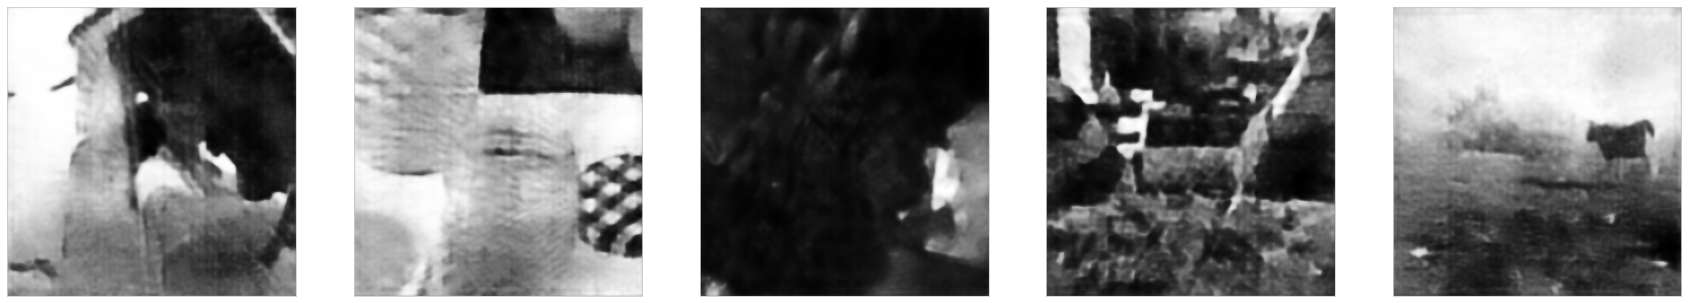

dU-net grad upsample Train


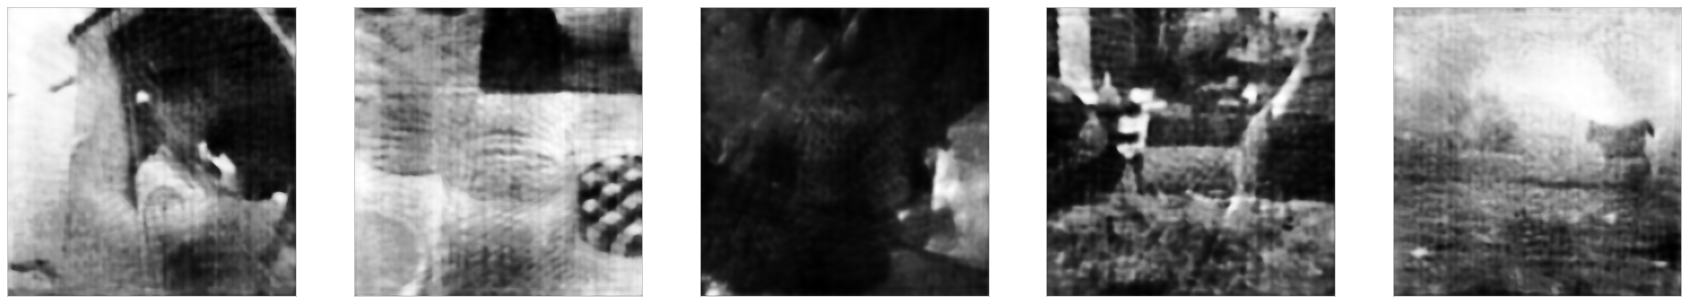

Adjoint Test


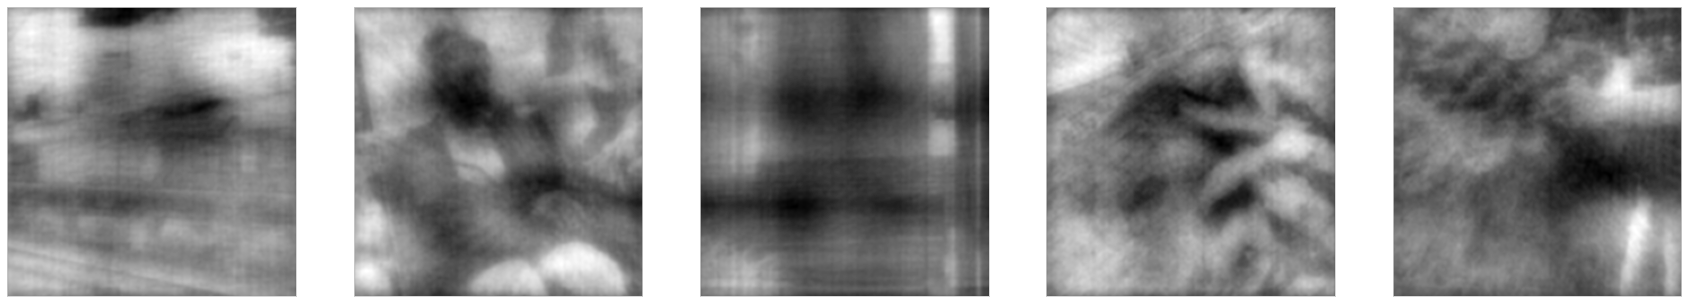

Learned Adjoint Test


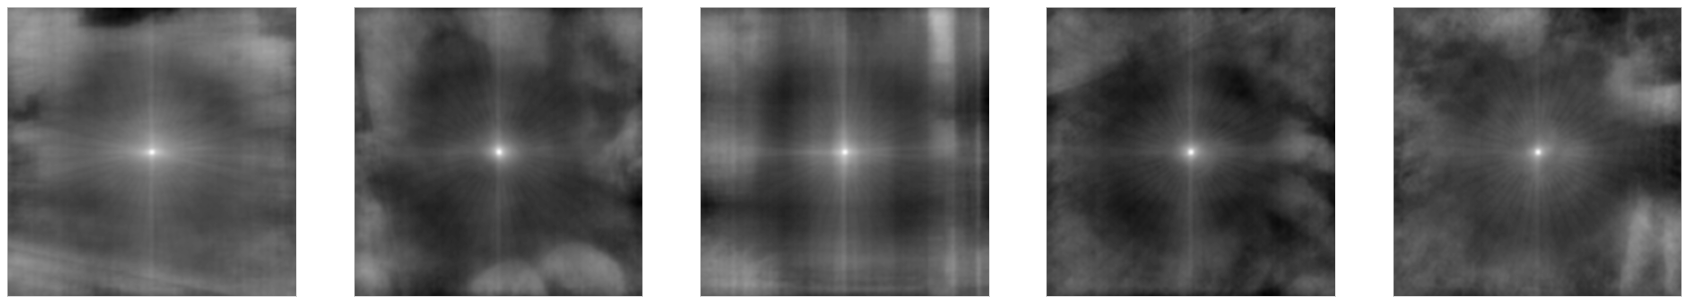

U-net Test


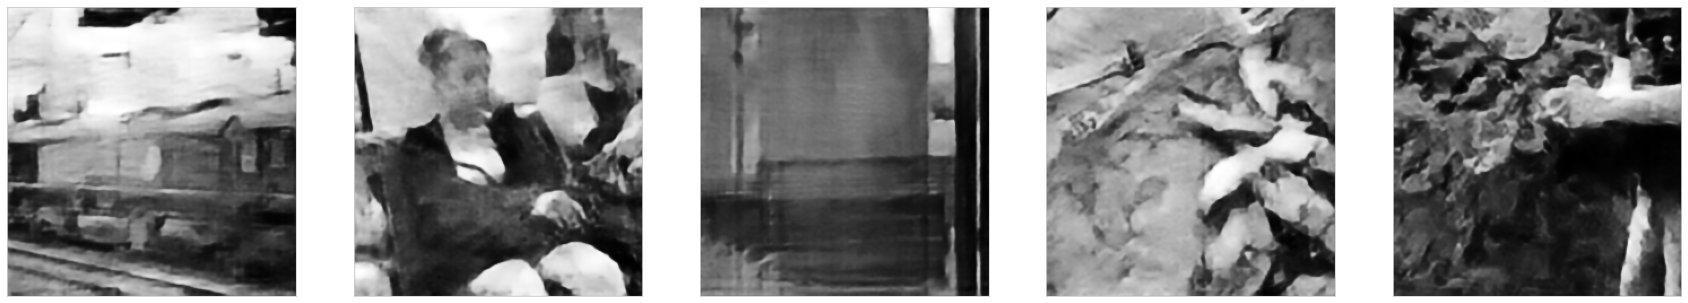

U-net learned adjoint Test


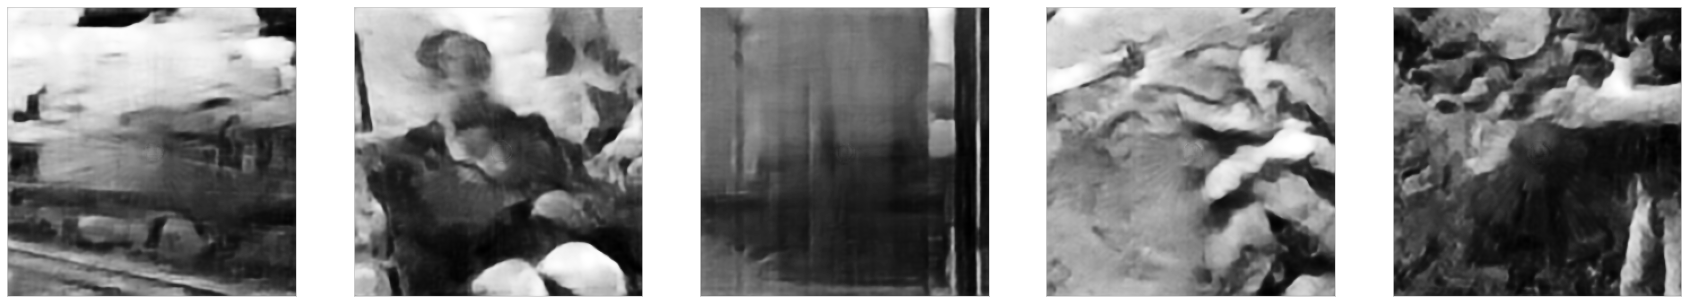

dU-net Test


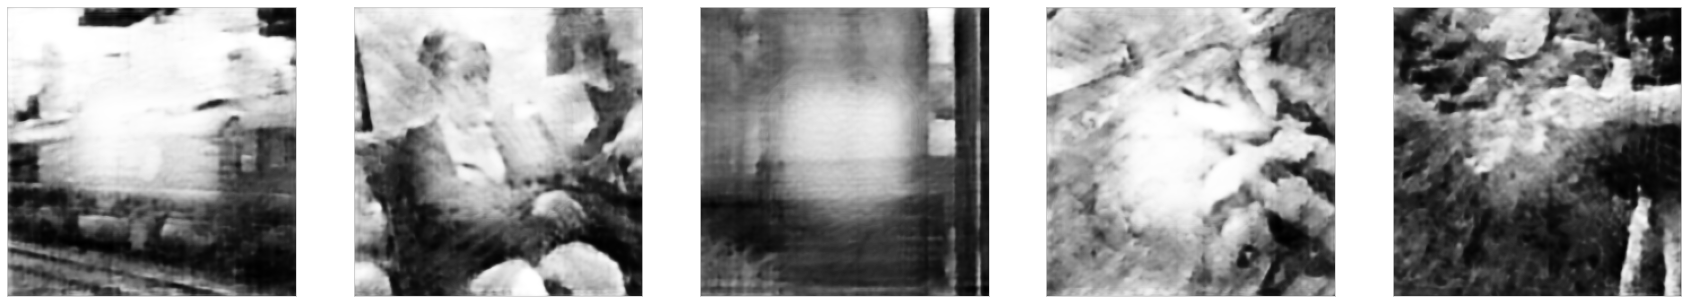

dU-net learned adjoint Test


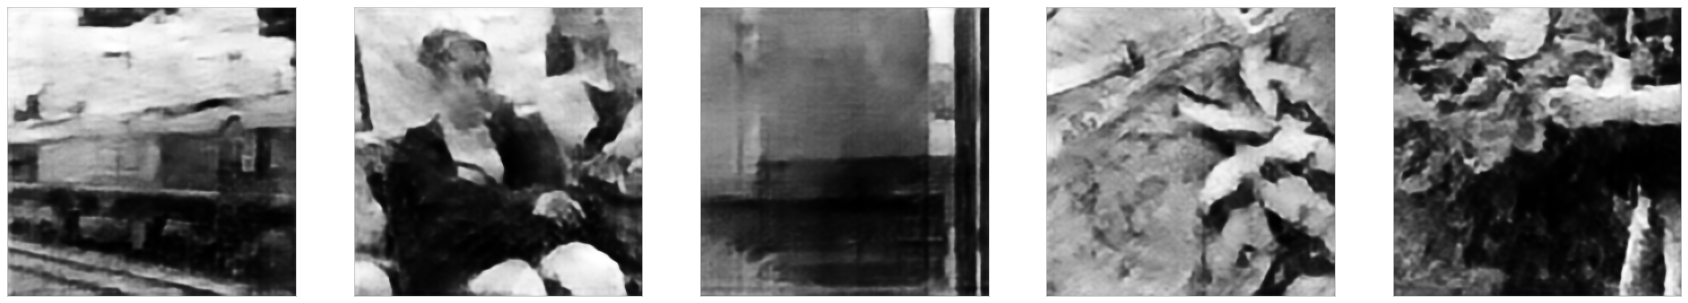

dU-net learned grad Test


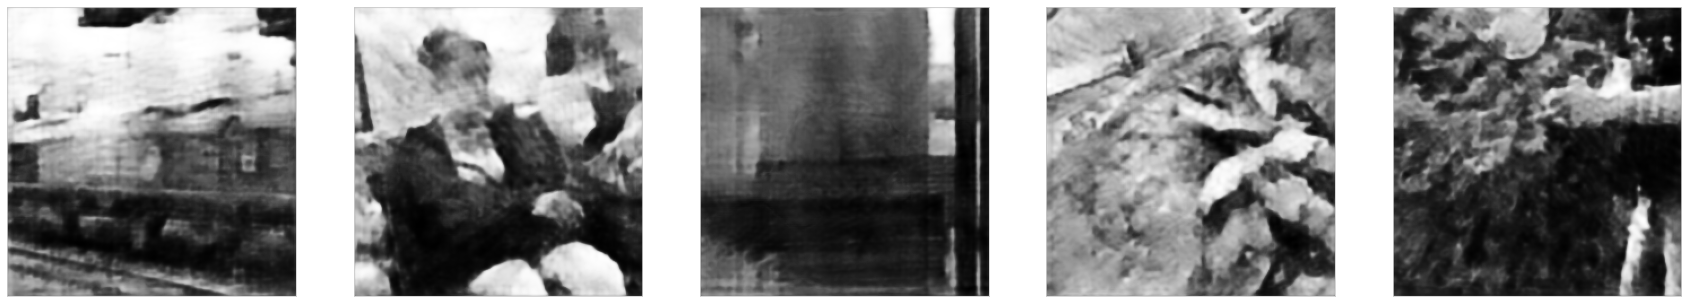

dU-net grad upsample Test


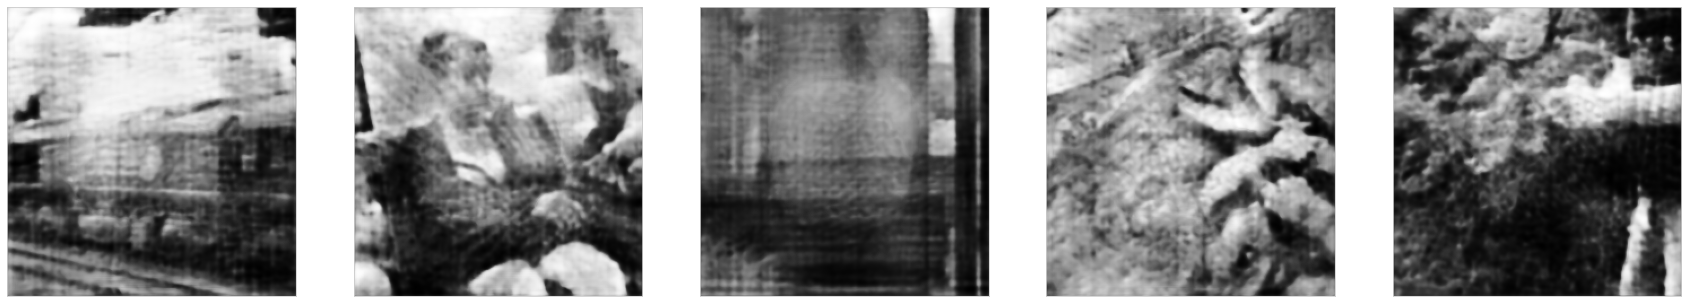

Primal Dual Train


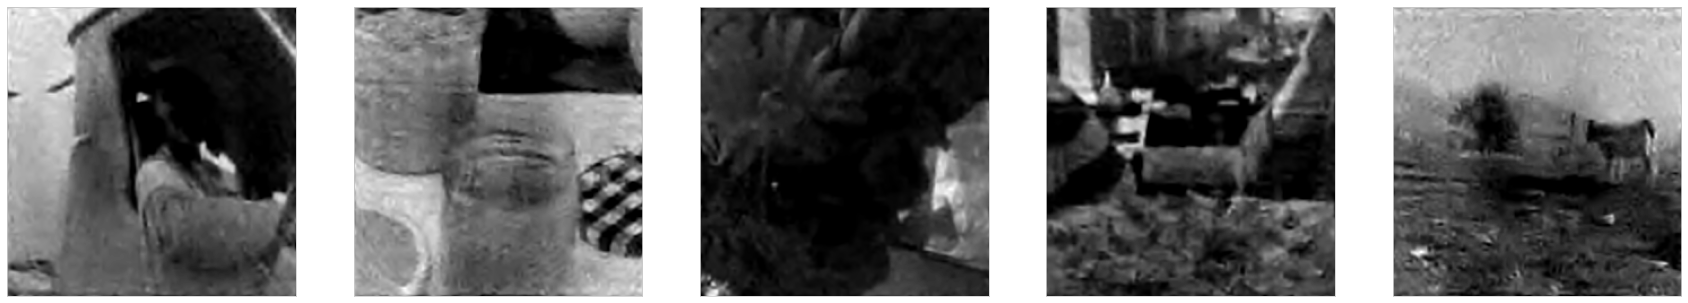

Primal Dual Test


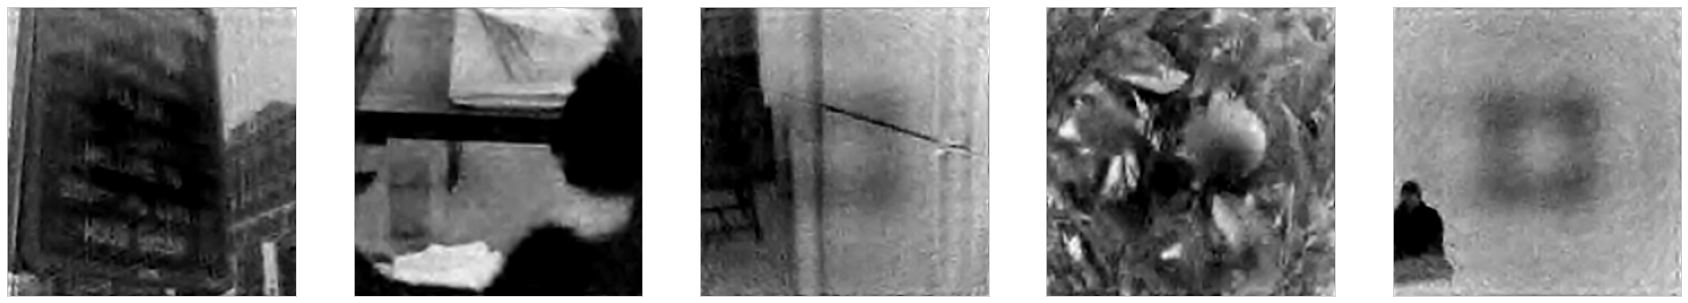

In [19]:
for e in examples:
    print(e[0], e[1])
    compare(e[2])

In [ ]:
unets.shape

In [ ]:
compare(unets)

In [ ]:
compare(test_ims, ncols=5, nrows=2, titles=train_titles, same_scale=False)

In [ ]:
# compare(test_ims, titles=test_titles)

In [ ]:
s = np.arange(1, 1.35,.05)

In [ ]:
len(s)

In [ ]:
statistics_robustness = pd.read_csv("statistics_robustness.csv")
with pd.option_context('mode.use_inf_as_na', True):
    statistics_robustness.dropna(inplace=True)

In [ ]:
statistics_robustness["Noise2"] = statistics_robustness["Noise"] // 200 

In [ ]:
plt.figure(figsize=(16,8))
for name, mode, _ in results:
    print(name, mode)
    if mode == "Train":
        sub = statistics_robustness[ statistics_robustness["Method"] ==  name].groupby("Noise").mean()
        if len(sub > 0):
            plt.plot(np.arange(12.5, 32.5, 2.5), sub['PSNR'].values, label = name)

plt.axis(ymin=12, xmin=30, xmax=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')


In [ ]:
plt.figure(figsize=(16,8))
for name, mode, _ in results:
    print(name, mode)
    if mode == "Train":
        sub = statistics_robustness[ statistics_robustness["Method"] ==  name].groupby("Noise").mean()
        if len(sub > 0):
            plt.plot(np.arange(12.5, 32.5, 2.5), sub['SSIM'].values, label = name)

plt.axis( xmin=30, xmax=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')


In [ ]:
statistics_robustness["Noise"]

In [ ]:
b

In [ ]:
b = statistics_robustness.groupby(["Method", "Noise"]).mean()

In [ ]:
b

In [ ]:
for i in range(10):

In [ ]:
plt.plot(b["PSNR"])

In [83]:
from skimage import io
import os
import glob

In [84]:
files = np.loadtxt("images.txt", dtype=str) # only a selection of the files are larger than (256,256)
files = glob.glob("./data/BSR/BSDS500/data/images/test/" + "*" + ".jpg")



In [100]:
sample_idx = 200


In [101]:
# im = io.imread(files[sample_idx][23:], as_gray=True)
im = io.imread(files[sample_idx], as_gray=True)

plt.imshow(im)
sample_idx += 1

IndexError: list index out of range

In [89]:
files[sample_idx][23:]

'/images/test/198087.jpg'